# Executive Summary
---


Renting a home is difficult due to the overwhelming amount of factors that go into a property like location, square footage, beds, baths, etc. Furthermore, prospective renters need to consider if the features of a home warrant the price of rent. While it is possible to gain intuition on if the rent for a property is worth it, we hope to provide a more concrete method to determine the rent of a property. 

We looked at a large dataset of Craiglist postings from Kaggle which contain both the features of the rental property and the rent of the property. So, the features of the rental property were our feature variables in our machine learning problem. The rental price was our target variable. We had to One-Hot encode some categorical features. We also chose to polynomially transform some of our features. Then, we used a Decision Tree Regressor to select the best features. We utilized scatter plots, pie graphs, bar graphs, and a choropleth map to visualize the spread and trends of our data. We then used Linear, Ridge, Lasso, and Support Vector Machine regression for our model testing. After optimization, we settled on Ridge regression that was trained on all features with some polynomial features as our best model. Our model provides strong evidence that there is a correlation between the features of a rental property and its rent.

# 1 Introduction
---


## Problem Statement
A major milestone in everyone’s life is homeownership, and with the popularity of home renovation shows, people are becoming more educated on what they are looking for when buying. Renting is often the first step towards homeownership. For these potential  renters, knowing how their desired features will affect the price of the house is important for them in order to pick the right location for them.

  Our project’s goal is to take the features that people want to have in their home and estimate the cost of it.

  We want to understand the trends relating to the cost of different features in regards to the total price of the listing as well as the relationship of the cost to the other listings in the surrounding area.

  We wanted to compare several supervised regression machine learning algorithms to see which is the best at predicting rental prices. We also want to compare whether preprocessing the features using feature selection will affect these machine learning algorithms.

## Significance of the Problem
This problem is incredibly significant, home ownership is widely considered to be a ticket to the middle class, however less and less are buying homes due to the inflated prices of the housing market. As a result more young people than ever are forced to rent, which is usually not preferable to buying a house. Mortgage payments develop equity, while renting does not. As a result, it is very important for young adults to make responsible decisions when deciding what apartment to rent out. Renting can actually be beneficial compared to home ownership, however only when it is done smartly. 

We hope that our project will be able to provide valuable insights to those who are looking for an apartment to rent. We would like to be able to identify certain characteristics of an apartment that have a large impact on price. For example, how much more does it cost on average to rent an apartment that provides parking? Given this data, we hope that people will be able to make responsible decisions in regards to what they value most, and be able to save money by only renting apartments that fit their needs perfectly.

## Questions/Hypothesis

**Questions**

Given the aforementioned problem and its importance, we set out to tackle the following questions:
* Given all details of a house listing, can we accurately predict the cost of renting the house/apartment in question?
* Will models that have implicit feature reduction (lasso / ridge) perform better than models that rely on all features (linear regression)?
* Will regression models trained on all feature perform better than regression models trained on selected features?
* Previous research tried using a Decison Tree Regressor to tackle the question of rental prices, can we find a more fitting model?

**Hypothesises**

* Features relate to price 
  * __Null:__ The features of a rental will not have a relationship with its price.
  * __Alternative:__ The features of a rental will have a relationship with its price.

* Features beds vs size (sqft)
   * __Null:__ The beds compared to the size of the house will not have a significantly different effect on the rental price.
   * __Alternative:__ The beds compared to the size of the house will have a significantly different effect on the rental price.
 
* Optimal Machine Learning algorithm
  * __Null:__ There is no difference between the performance of lasso and ridge regression.
  * __Alternative:__ There will be a significant difference between the performance of ridge regression and lasso regression.

* Average price of houses that allow pets vs not allowing pets
  * __Null:__ the average rental price of a houses that allow pets is the same as the average rental price of houses that do not allow pets
  * __Alternative:__ the average rental price of a houses that allow pets is different than the average rental price of houses that do not allow pets


**Previous Work**

Attempting to predict rental prices use machine learning has been done many times in the past. Some previous researched used deep neural networks. Since we do not have the tools to do this, we want to compare our model to research that uses a model we covered. So, we would like to compare our model to a previous model that used a decision tree regressor.

### References TODO - APA/MLA

Aragay, Víctor. “rromanss23/Machine_Leaning_Engineer_Udacity_NanoDegree.” GitHub, github.com/rromanss23/Machine_Leaning_Engineer_Udacity_NanoDegree/blob/master/projects/boston_housing/boston_housing.ipynb. 

Zhou, X.; Tong, W.; Li, D. Modeling Housing Rent in the Atlanta Metropolitan Area Using TextualInformation and Deep Learning. ISPRS Int. J. Geo-Inf. 2019,8, 349.

Seya, Hajime, and Daiki Shiroi. “A Comparison of Apartment Rent Price Prediction Using a Large Dataset: Kriging versus DNN.” ArXiv:1906.11099 [Cs, Stat], June 2019. arXiv.org, http://arxiv.org/abs/1906.11099.

# 2 Method
---

### 2.1 Data Acquisition

**How we obtained our data**

We obtained our data through kraggle. This kaggle dataset contains web scraped Craigslist posts throughout the United States. While the data is now 6 months old, we believe the US housing market has not drastically changed and thus our findings can hopefully be applied to more recent Craiglist posts.

https://www.kaggle.com/austinreese/usa-housing-listings

**Uploaded Dataset**

https://www.dropbox.com/s/vzxvcm35634pycc/housing.csv?dl=1

**Desciption**

Our dataset contains Craigslist house/apartment rental postings. It has 380k rows and 22 columns. The features relate to the rental property. They include contruinos data points like the cost of the rental, the size of the rental, and where the rental is located (latitude longitude). It also has discrete information on the house like the number of beds and baths it has and what type of rental is its (house, apartment, townhouse). Finally, it also includes many features on the amenities of the rental, like if it has washing, or parking, or allows pets, if the rental is furnished, if smoking is allowed, etc.


### 2.2 Variables

*Rental Prices are in USD*

**Independent Variables (features)**

|Variable name in file | Description|
| ----------- | ----------- |
|type|Whether its an apartment or house, other housing type|
|sqfeet|Total square footage of location|
|beds|Number of bedrooms|
|baths|Number of bathrooms|
|cats_allowed|Are cats allowed|
|dogs_allowed|Are dogs allowed|
|smoking_allowed|Is smoking allowed|
|wheelchair_access|Is the location wheelchair accessible|
|electric_vehicle_charge|Is there an electric car port|
|comes_furnished|Does the posting come fully furnished|
|laundry_options|What are the laundry options(in house, off site, in building)|
|parking_options|What is the parking situation like|
|state|What state is the listing in|
|region|Which region of that state is the listing in|


**Dependent Variable (target)**
* price of rental property



**Necessary Preprocessing**

First, these are not all the features of the dataset. We drop many columns we do not believe will be useful like the URL of the posting and the id of the posting. Next, we choose to drop the description of the rental property as we did not feel we needed to engineer more features out of it. Some of our variables need to be one-hot encoded. These variables are 'region', 'type', 'laundry_options', 'parking_options', and 'state'.

### 2.3 Data Analysis


**Predictive Model**

We would like to predict the rental price based on the features of a craigslist posting. So, our outcome variable (dependent variable) is the rental price, and our input variables (independent variables) are all the features of the craigslist post. We believe these features are important predictors as it describes most of the objective features of rental property. We would like to assume that the pricing of a rental property is not entirely random. All our predictive models will use the same features (features of the Craiglist post) and attempt to predict the same target (rental price)

**A Supervised Learning Problem**

This is a supervised machine learning problem. We will be trying to predict a continuous variable so it is a regression problem. 

**Machine Learning Algorithms to be Applied**

We are going to use each of the major regression models we learned in class, those being linear regression, lasso regression, and ridge regression. We want to use linear regression as a base line. Since we have many features, we hope that lasso and ridge can help isolate the most important features. We will also use feature selection to see if we get better results. We will also use SVM as it works well with large datasets with high dimensionality. We will also attempt to use polynomial transformations on our data.



# 3 Results
---

### 3.1 Data Wrangling


In [1]:
import pandas as pd
# Loads the dataset from dropbox
df = pd.read_csv('https://www.dropbox.com/s/vzxvcm35634pycc/housing.csv?dl=1')

In [2]:
from sklearn.preprocessing import OneHotEncoder
# Some variables are categorical and need to be one hot encoded
def encode_col(col):
    encoder = OneHotEncoder(sparse=False)
    # finds the column to encode, replaces NA values with "unknown_[name of column]"
    # reshapes column to be many rows and 1 column
    to_encode = df[col].fillna('unknown_' + col).values.reshape(-1, 1)
    # fits encoder to column
    encoded_df = encoder.fit(to_encode).transform(to_encode)
    #encodes column and makes a df with the names of the one hot encoded variables
    features = pd.DataFrame(encoded_df, columns=encoder.get_feature_names())
    return features

In [3]:
def encode_df(df):
    out = df
    # encodes each column that is categorical
    out = out.merge(encode_col('region'), how='outer', 
                  left_index = True, right_index = True)
    out = out.merge(encode_col('type'), how='outer', 
                  left_index = True, right_index = True)
    out = out.merge(encode_col('laundry_options'), how='outer', 
                  left_index = True, right_index = True)
    out = out.merge(encode_col('parking_options'), how='outer', 
                  left_index = True, right_index = True)
    out = out.merge(encode_col('state'), how='outer', 
                  left_index = True, right_index = True)
    return out

In [4]:
from scipy import stats
import numpy as np
def reduce_df(df):
    # encodes the necessary columns
    out = encode_df(df)
    # drops useless columnds and encoded columns
    del out['url']
    del out['id']
    del out['laundry_options']
    del out['parking_options']
    del out['image_url']
    del out['region']
    del out['region_url']
    del out['type']
    del out['description']
    del out['state']
    out = out.fillna(0)
    
    # removes outliers from data as defined by lower and upper thres
    # current removes the bottom 1% and top 1% of values
    lower_thres = 1
    upper_thres = 99
    
    # returns the outlier values (low and high) for a column
    def outlier_values(df, col, lower_thres, upper_thres):
        lower = np.percentile(out[col], lower_thres)
        upper = np.percentile(out[col], upper_thres)
        return lower, upper
    
    # returns a dictionary of the outlier values for the 4 relevent continous variables
    def all_outlier_values(df, lower_thres, upper_thres):
        cols = ['price', 'beds', 'baths', 'sqfeet']
        output = {}
        for col in cols:
            output[col] = outlier_values(df, col, lower_thres, upper_thres)
        return output
            
    bounds = all_outlier_values(out, lower_thres, upper_thres)
    # removes any value that is an outlier in any of the 4 columns
    return out[((out['price'] > bounds['price'][0]) & (out['price'] < bounds['price'][1]))
              &((out['beds'] > bounds['beds'][0]) & (out['beds'] < bounds['beds'][1]))
              &((out['baths'] > bounds['baths'][0]) & (out['baths'] < bounds['baths'][1]))
              &((out['sqfeet'] > bounds['sqfeet'][0]) & (out['sqfeet'] < bounds['sqfeet'][1]))]


In [5]:
# splits a dataset into feature and column datasets
def feature_target_df(df):
    features = df.drop(['price'], axis = 1) 
    target = df['price']
    return features, target

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler

# scales all features 
def scaled_feature_target(df):
  # many different scaling methods were tried, all yielded  similar results so
  # we chose to use the fastest - MinMaxScalar
  scaler = MinMaxScaler()
  # scaler = PowerTransformer(method='yeo-johnson') - too slow
  # scalar = QuantileTransformer(output_distribution='normal') - similar to MinMax
  # scalar = RobustScaler(quantile_range=(25, 75)) - similar to MinMax
  features, target = feature_target_df(df)
    
  scaler.fit(features)
    
  return pd.DataFrame(scaler.transform(features), columns=features.columns.values.tolist()), target

In [7]:
from sklearn.model_selection import train_test_split
# splits and scales the dataset
def split_df_train_test(df):
  features, target = scaled_feature_target(df)
  return train_test_split(features, target, random_state=3000)

In [8]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from datetime import datetime

# selects the most importatn features
def select_feature(df):
    # select = RFE(DecisionTreeRegressor(random_state=3000),n_features_to_select=250)
    # we wanted to use recursive feature elimnation but the run time was too slow
    select = SelectFromModel(DecisionTreeRegressor(random_state=3000), threshold='median')
    
    X_train, X_test, y_train, y_test = split_df_train_test(df)
    select.fit(X_train, y_train)
    return pd.DataFrame(select.transform(X_train)),pd.DataFrame(select.transform(X_test)), y_train, y_test

In [9]:
# splits a dataset into feature and target with no feature selection
def split_df_selected(df):
    return select_feature(reduce_df(df))

# splits a dataset into features and target with feature selection
def split_df_all(df):
    return split_df_train_test(reduce_df(df))

In [10]:
from sklearn.preprocessing import PolynomialFeatures
# tranforms some continous variables to a polynomial form
# we choose to do polynomial transformation after we observed our machine
# learning models performing poorly if we kept the values strictly linear
def convert_columns_to_polynomial(df):
  # remove outliers, remove useless cols, and one hot encodes df
  r_df = reduce_df(df)

  # Create a polynomialFeatures object with degree = 10 
  poly = PolynomialFeatures(degree=10,include_bias = False)
 
  # tranforms 3 cols we believe to be non-linear
  poly_sqfeet = poly.fit_transform(r_df['sqfeet'].values.reshape(-1,1))
  poly_beds = poly.fit_transform(r_df['beds'].values.reshape(-1,1))
  poly_baths =  poly.fit_transform(r_df['baths'].values.reshape(-1,1))
 
   # Create dataframes from our transformed features
  poly_sqfeet_df = pd.DataFrame(poly_sqfeet)
  poly_beds_df = pd.DataFrame(poly_beds)
  poly_baths_df =  pd.DataFrame(poly_baths)
 
  # drops untransformed cols
  r_df = r_df.drop(['sqfeet','beds','baths'], axis=1)
 
  # adds transformed cols to full dataset
  r_df = pd.concat([r_df, poly_sqfeet_df,poly_beds_df,poly_baths_df], axis=1, sort=False)
  
  # ensures there is no NA values
  r_df = r_df.fillna(0)
 
  return r_df

In [11]:
# splits a dataset into features and target with polynomial features
def split_polynomial(df):
  return select_feature(convert_columns_to_polynomial(df))
 
# splits a dataset into features and target with polynomial features and feature selection
def split_polynomial_no_select(df):
  return split_df_train_test(convert_columns_to_polynomial(df))

### 3.2 Data Exporation 

In [12]:
from scipy import stats
import numpy as np
# cleans up the dataset a little but does not one hot encode
# used for visualization purposes
def reduce_df_graphs(df):
    out = df.fillna(0)
    del out['url']
    del out['id']
    del out['laundry_options']
    del out['parking_options']
    del out['image_url']
    del out['region']
    del out['region_url']
    del out['description']
    
    # removes outliers from data as defined by lower and upper thres
    # current removes the bottom 1% and top 1% of values
    lower_thres = 1
    upper_thres = 99
    
    # returns the outlier values (low and high) for a column
    def outlier_values(df, col, lower_thres, upper_thres):
        lower = np.percentile(out[col], lower_thres)
        upper = np.percentile(out[col], upper_thres)
        return lower, upper
    
    # returns a dictionary of the outlier values for the 4 relevent continous variables
    def all_outlier_values(df, lower_thres, upper_thres):
        cols = ['price', 'beds', 'baths', 'sqfeet']
        output = {}
        for col in cols:
            output[col] = outlier_values(df, col, lower_thres, upper_thres)
        return output
    
    bounds = all_outlier_values(out, lower_thres, upper_thres)
    return out[((out['price'] > bounds['price'][0]) & (out['price'] < bounds['price'][1]))
              &((out['beds'] > bounds['beds'][0]) & (out['beds'] < bounds['beds'][1]))
              &((out['baths'] > bounds['baths'][0]) & (out['baths'] < bounds['baths'][1]))
              &((out['sqfeet'] > bounds['sqfeet'][0]) & (out['sqfeet'] < bounds['sqfeet'][1]))]


In [13]:
graphDF = reduce_df_graphs(df)
# gets a sample as out dataset is very large
sampleDF = graphDF.sample(n=10000, random_state=3000)
# remove listings with latitude and longitudes no in the USA
latDF = sampleDF[(sampleDF['lat'] < 80) & (sampleDF['lat'] > 0)]
latLongdf = latDF[sampleDF['long'] < -30]
 
 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [14]:
import plotly.express as px
graphDF3 = graphDF.set_index('state')
graphDF3 = graphDF3.groupby(level='state').mean().reset_index()
graphDF3['state'] = [x.upper() for x in graphDF3['state']]

heat = px.choropleth(graphDF3, locations=graphDF3['state'], locationmode='USA-states', color='price', scope='usa', title="Average Price per State")
heat.show()

<center> <img src="https://user-images.githubusercontent.com/62403689/101290081-2ba5aa00-37ce-11eb-967b-909bba61435a.png"> </center>

The Choropleth graph above shows the average price for a housing option in each state. The trends that are seen in this graph follow what we expected. States states with large cities/large general populations have more expensive postings. Furthermore, states with high tourism and isolation have higher prices as well (Hawaii and Alaska). 

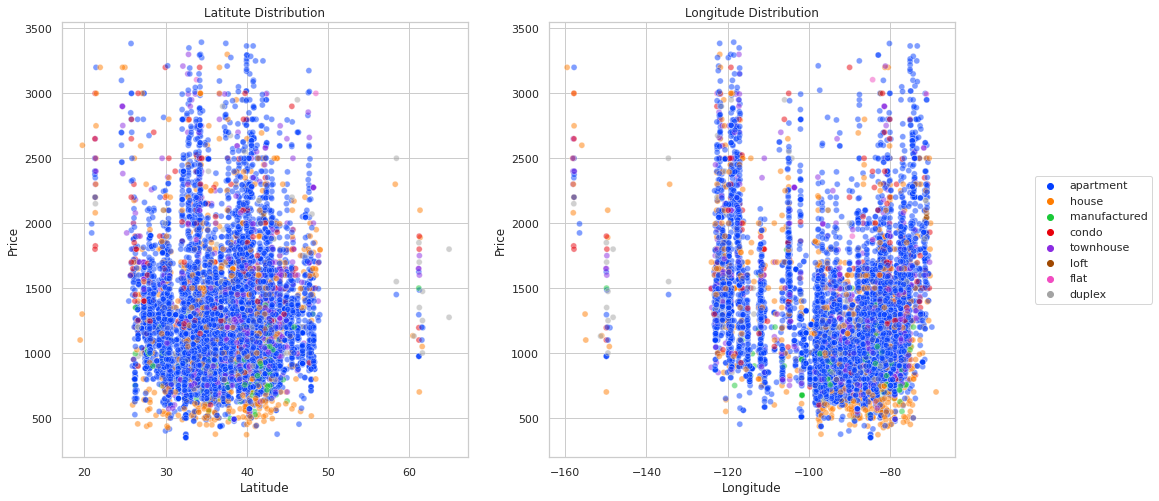

In [15]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
latplot = sns.scatterplot(data=latLongdf, x="lat", y='price', hue='type', palette='bright', legend=False, alpha=.5)
latplot.set_title("Latitute Distribution")
plt.ylabel("Price")
plt.xlabel("Latitude")
 
plt.subplot(1, 2, 2)
longplot = sns.scatterplot(data=latLongdf, x="long", y='price', hue='type', palette='bright', alpha=.5)
plt.ylabel("Price")
plt.xlabel("Longitude")
longplot.set_title("Longitude Distribution")
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)
 
plt.savefig("latlong.png", bbox_inches='tight')

<center> <img src="https://user-images.githubusercontent.com/62403689/101542765-4401fa00-3971-11eb-8658-f44a67301223.png"> </center>

The two graphs above help to reinforce the idea that location is important, as shown in the Heat graph above. The major groupings of the data points on the latitude and longitude roughly correspond with places that intersect with large metropolitan area. We see higher rental prices at 40 latitude and 32 latiude, which line up well with NYC (40) and LA (32). We see higher prices at the tail ranges of longitude correlated to the east and west coast. We also see a dip in rental prices in the middle of the country.

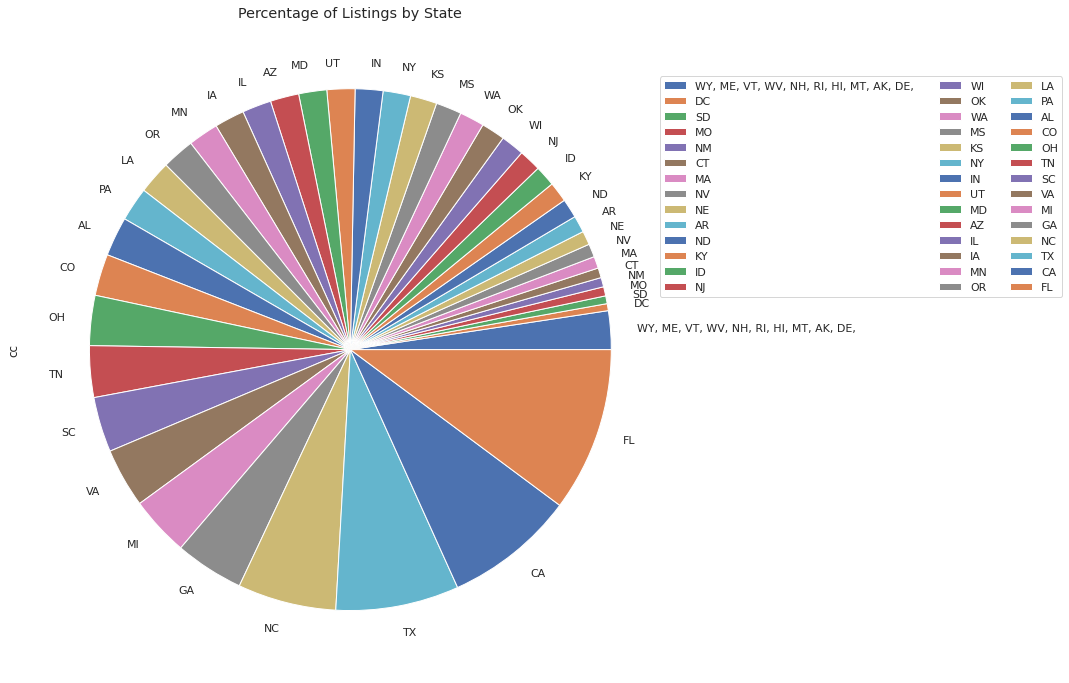

In [16]:
state_dict = {}
def countState(x):
    if x in state_dict:
        state_dict[x] += 1
    else:
        state_dict[x] = 1
 
graphDF['state'].apply(countState)
keys = sorted(state_dict, key=lambda ii: state_dict[ii])
keys = [string.upper() for string in keys]
vals = list(state_dict.values())
vals.sort()
valsV2 = [0]*42
keysV2 = [""]*42
jj = 0
for ii in range(51):
    if ii < 10:
        valsV2[jj] += vals[ii]
        keysV2[jj] = keysV2[jj] + keys[ii]+ ", "
    else:
        jj += 1
        valsV2[jj] = vals[ii]
        keysV2[jj] = keys[ii]
        
stateDF = pd.DataFrame({"cc":valsV2}, index=keysV2)
statePieUpper75 = stateDF.plot.pie(y="cc", figsize=(12,12), sort_columns=True)
statePieUpper75.set_title("Percentage of Listings by State", fontsize='large')
statePieUpper75.legend(ncol=3, loc= "center right", bbox_to_anchor=(1.6,0.75))
statePieUpper75.figure.savefig("PiePlot.png", bbox_inches='tight')


<center> <img src="https://user-images.githubusercontent.com/62403689/101290088-2e080400-37ce-11eb-94fb-5e4306d835ef.png"> </center>

The pie chart used here is to help visualize the breakdown of the number of listings we use per state. The ten states with the lowest numbers of listings were combined into one section in order to make their appearance on the graph visible, but their individual numerical impact is extremely low. It is interesting to see the most posting in Florida despite there being other states with larger populations (TX & CA).


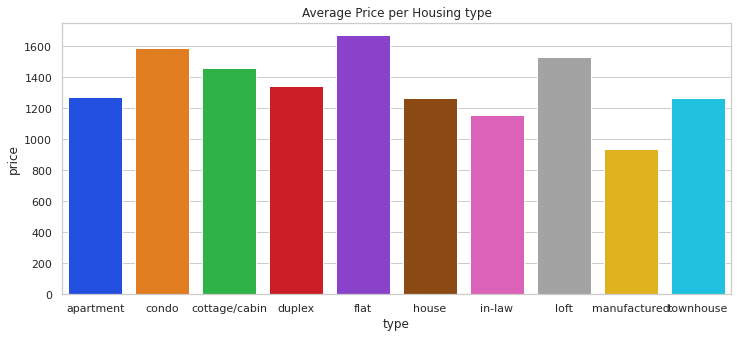

In [17]:
graphDF2 = graphDF.set_index("type")
graphDF2 = graphDF2.groupby(level='type').mean().reset_index()
plt.figure(figsize=(12,5))
tpyeP = sns.barplot(data=graphDF2, x='type', y='price', palette="bright")
tpyeP.set_title("Average Price per Housing type")
plt.savefig("PricePerType.png")
plt.show()

<center> <img src="https://user-images.githubusercontent.com/62403689/101290084-2cd6d700-37ce-11eb-829c-f0514bfd5e0c.png"> </center>

The bar chart above shows the average cost of each housing type for the US as a whole. Unsurprisingly, places that are more likely to be found in metropolitan areas (flats, condos, and lofts) are in the top end of the prices, while places that can be found in more rural areas are priced lower. We notice that apartment is lower than loft and flat, though they are all very similar. The following graph will attempt to answer why that is.


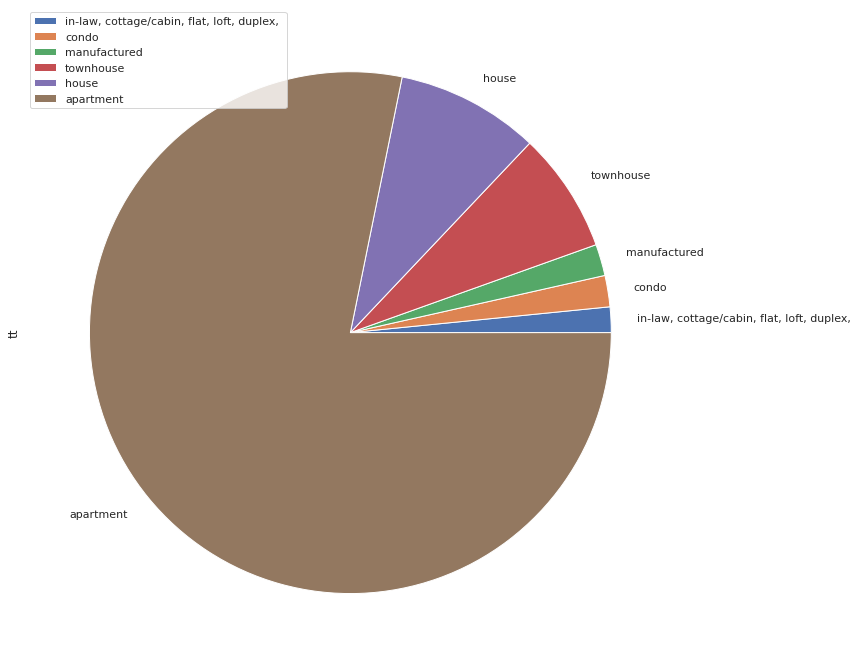

In [18]:
type_dict = {}
def counttype(x):
    if x in type_dict:
        type_dict[x] += 1
    else:
        type_dict[x] = 1
 
graphDF['type'].apply(counttype)
tkeys= sorted(type_dict, key=lambda ii: type_dict[ii])
tvals = list(type_dict.values())
tvals.sort()
tvalsV2 = [0]*6
tkeysV2 = [""]*6
jj = 0
for ii in range(10):
    if ii < 5:
        tvalsV2[jj] +=tvals[ii]
        tkeysV2[jj] = tkeysV2[jj] + tkeys[ii]+ ", "
    else:
        jj += 1
        tvalsV2[jj] = tvals[ii]
        tkeysV2[jj] = tkeys[ii]
        
typeDF = pd.DataFrame({'tt':tvalsV2}, index=tkeysV2)
typePie = typeDF.plot.pie(y='tt', figsize=(12, 12), sort_columns=True)
typePie.figure.savefig("typePie.png")

<center> <img src="https://user-images.githubusercontent.com/62403689/101292911-67496f80-37e0-11eb-97d7-3fc4ac29b203.png"> </center>

As we can see, overwhelmingly, the postings on Craiglist are for apartments. So, the users who choose to list their rental property as a loft or flat may be trying to differentiate themselves, and thus set higher prices.

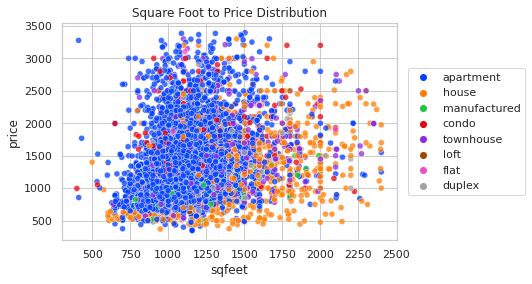

In [19]:
sqpplot = sns.scatterplot(data=sampleDF, x="sqfeet", y='price', hue='type', palette='bright', alpha=.75)
sqpplot.set_title("Square Foot to Price Distribution")
sqpplot.legend(loc='center right', bbox_to_anchor=(1.4, 0.5), ncol=1)
plt.savefig("PSQ.png", bbox_inches='tight')

<center> <img src="https://user-images.githubusercontent.com/62403689/101542758-419fa000-3971-11eb-9c2f-36587cf7f9a5.png"> </center>

The graph above represents a scatter plot of the square footage of each listing in comparison to its prices. There is a weak, but positive trend that can be seen that as the square footage increases, so does the price, which makes sense since there is more living space to pay for. We can see can see a majority of the sample used falls within 750-1500 square feet, and the higher we go, there are more listings with higher prices.

### 3.3 Model Construction


#### T-test for average price of houses that allow pets vs not allowing pets

In [20]:
from scipy import stats
mod_df = reduce_df(df)

# splits the dataset into rental properties that allow pets vs does not allow prices
all_pet_data = mod_df['price']
pets_allowed = mod_df[(mod_df.cats_allowed == 1)|(mod_df.dogs_allowed == 1)]['price']
pets_not_allowed = mod_df[(mod_df.cats_allowed == 0)&(mod_df.dogs_allowed == 0)]['price']

In [21]:
import warnings
def t_test(ds1, ds2, all_ds):
    def assumpt_str(p):
        return 'Assumption is ' + ('met. p > .05' if p > .05 else 'not met. p < .05')
    
    print('T-test')
    print('')
    t, p = stats.ttest_ind(ds1,ds2)
    print('degrees of freedom: ' + str(len(all_ds) - 2))
    print('t-value: ' + str(t), 'p-value: ' + str(p))
    
    print('')
    print('Assumption Checks')
    print('Assumption of Equality of Variances:')
    lev = stats.levene(ds1,ds2)
    print(lev)
    print(assumpt_str(lev[1]))
    

    warnings.filterwarnings("ignore")
    print('')
    print('Assumption of Normality:')
    print('ds1')
    shap = stats.shapiro(ds1)
    print(shap)
    print(assumpt_str(shap[1]))
    print('ds2')
    shap = stats.shapiro(ds2)
    print(shap)
    print(assumpt_str(shap[1]))

t_test(pets_allowed, pets_not_allowed, all_pet_data)

T-test

degrees of freedom: 162313
t-value: -8.190810676627391 p-value: 2.6133066598995676e-16

Assumption Checks
Assumption of Equality of Variances:
LeveneResult(statistic=477.2833693936198, pvalue=1.1846695576653024e-105)
Assumption is not met. p < .05

Assumption of Normality:
ds1
(0.9019138813018799, 0.0)
Assumption is not met. p < .05
ds2
(0.9258409738540649, 0.0)
Assumption is not met. p < .05


While we found a significant p-value (p < .05), we cannot interpret anything from this as our assumptions of equal variance and normality were not met.

In [22]:
def mann_whit(ds1, ds2, all_ds):
    print('Mann-Whitney-test')
    print('')
    t, p = stats.mannwhitneyu(ds1,ds2)
    print('degrees of freedom: ' + str(len(all_ds) - 2))
    print('statistic: ' + str(t), 'p-value: ' + str(p))

mann_whit(pets_allowed, pets_not_allowed, all_pet_data)

Mann-Whitney-test

degrees of freedom: 162313
statistic: 2340260570.0 p-value: 2.2424791931924423e-05


Using a test that has less assumptions, we still have a significant p value. 

We will interpret this in section 4.


#### Model Training

In [23]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
 
# Estimators that we will use:
estimators = {'Linear Regression': LinearRegression(), 
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    "Support Vector Machine": LinearSVR(max_iter = 1000000)}
 
# Use our estimators with the given data to determine R-Squared and MSE values
def run_models(X_train, X_test, y_train, y_test):
    # Iterate over the estimators
    for x in estimators.keys():
        # Train the model
        model = estimators[x].fit(X=X_train,y=y_train)
        # Print the results
        print(x + ":")
        print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train)))
        print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test)))
        print("\tMSE value for training set: ", mean_squared_error(y_train, model.predict(X_train)))
        print("\tMSE value for testing set: ", mean_squared_error(y_test, model.predict(X_test)))


Next we will get the coefficients for certain features for use in our hypothesis section later on

In [24]:
# Get coefficients for the Ridge regression model for inputted columns as well as 
# the most influential column
def get_Ridge_Coeff(ft1,ft2):
  X_train, X_test, y_train, y_test = split_df_all(df)
  # Create and train the Ridge model
  model = Ridge().fit(X=X_train,y=y_train)
  max = 0
  maxName = ""
  for i, name in enumerate(X_train.columns):
    # Find the max coefficient and its corresponding feature name
    if model.coef_[i] > max:
      max = model.coef_[i]
      maxName = name
    # Print the selected feature and its coefficient
    if name == ft1 or name == ft2:
      print(name,": ",model.coef_[i])
  print("Most impactful Feature:",maxName,": ",max)

get_Ridge_Coeff('sqfeet','beds')

sqfeet :  1075.0137889200896
beds :  20.53502281626721
Most impactful Feature: x0_florida keys :  1286.3385492002744


### 3.4 Model Evaluation

The metrics we will analyze are r-squared and mean squared error. R-squared (R2) essentially tells us the accuracy of our model. 
More specifically it tells us what amount of variance in our target variable (price) can be explained by our features.
This value typically ranges between 0 and 1. Values closer to 1 tend to reflect that a model's features are better at predicting the target, which means the model could be considered better than other models 
with lower r squared values (all other things being the same).
 
Mean squared error represents how far our results are from the intended values,
or more specifically the squared distance of our predictions
from the actual value. MSE ranges from 0 to infinity, lower values are prefered,
as they indicate that predictions are on average off the expected values by 
lower amounts.
 

In [25]:
# Run polynomial and linear in different cells or it will crash
 
# Evaluating model's performance with all features used
print("Test results with all features used:\n")
X_train_all, X_test_all, y_train_all, y_test_all = split_df_all(df)
run_models(X_train_all,X_test_all,y_train_all,y_test_all)
 
# Evaluating model's performance with selected features used
print("\n","Test results with only selected features used:\n")
X_train_selected, X_test_selected, y_train_selected, y_test_selected = split_df_selected(df)
run_models(X_train_selected,X_test_selected,y_train_selected,y_test_selected)

Test results with all features used:

Linear Regression:
	R-squared value for training set:  0.7058288129089417
	R-squared value for testing set:  -7098257831206405.0
	MSE value for training set:  72627.42225388566
	MSE value for testing set:  1.7363700303843127e+21
Ridge:
	R-squared value for training set:  0.7058036944164894
	R-squared value for testing set:  0.7004967443479653
	MSE value for training set:  72633.62371561193
	MSE value for testing set:  73264.24166087776
Lasso:
	R-squared value for training set:  0.5988476552161994
	R-squared value for testing set:  0.5957660568251557
	MSE value for training set:  99039.81766824433
	MSE value for testing set:  98883.37686285218
Support Vector Machine:
	R-squared value for training set:  0.6184432111552587
	R-squared value for testing set:  0.6146558391756416
	MSE value for training set:  94201.9043105192
	MSE value for testing set:  94262.57373991299

 Test results with only selected features used:

Linear Regression:
	R-squared valu

Now we will analyze the performance of our models. Right off the bat we can see
that the performance of linear regression on all features is horrible. We believe
that this is a case of extreme overfitting, as the training set performance is 
signficiantly better than the testing set performance. We believe that this is 
due to the linear regression model being unable to fit a line that generalizes 
well to all features, possibility to the large number of them. 

This is supported by
performance with selected features, which is much better. Clearly removing less important 
features and allowing the regression model to focus more on the important ones improved
performance by alot. 

We see the opposite pattern with our other models, which see
a decrease in performance with selected features. We believe that this is because
these models have built in feature selection mechanisms, and that their method of
doing so for these models is more effective than our own. Our best performing 
models are Linear regression with selected features, and Ridge regression with
all features. Our worst performing model is Linear regression with all features.


We also see that r-squared values and MSE generally change in tandem with each other.
So Looking at one model's r-squared in comparison to another's give you a strong idea of
what their MSE would be, comparatively speaking.

In [26]:
# Evaluating model's performance with all polynomial features used
print("Test results with all polynomial transformed features used:\n")
X_train_poly_all, X_test_poly_all, y_train_poly_all, y_test_poly_all = split_polynomial_no_select(df)
run_models(X_train_poly_all,X_test_poly_all,y_train_poly_all,y_test_poly_all)
 
# Evaluating model's performance with selected polynomial features used
print("\nTest results with selected polynomial transformed features used:\n")
X_train_poly, X_test_poly, y_train_poly, y_test_poly = split_polynomial(df)
run_models(X_train_poly,X_test_poly,y_train_poly,y_test_poly)

Test results with all polynomial transformed features used:

Linear Regression:
	R-squared value for training set:  0.8972207870458848
	R-squared value for testing set:  -5.2608826366858536e+16
	MSE value for training set:  54818.47665420574
	MSE value for testing set:  2.810417622859823e+22
Ridge:
	R-squared value for training set:  0.8972240089237965
	R-squared value for testing set:  0.8991902290578707
	MSE value for training set:  54816.75822852405
	MSE value for testing set:  53853.61666054975
Lasso:
	R-squared value for training set:  0.8440889809483068
	R-squared value for testing set:  0.8466856155691419
	MSE value for training set:  83156.93720902796
	MSE value for testing set:  81902.1212976203
Support Vector Machine:
	R-squared value for training set:  0.8673841267551899
	R-squared value for testing set:  0.8691031431693531
	MSE value for training set:  70732.2029668904
	MSE value for testing set:  69926.44744600417

Test results with selected polynomial transformed features

We see much better performance with our polynomial transformed features:
Again we see that linear regression performs horribly with all features used, 
whereas the other algorithms perform better, this is for the same reason as mentioned
previously. With selected polynomial features the performance for linear regression goes 
up significantly, while the performance of the other algorithms decrease. Again this 
can be explained by our explanation above. Our best 
performing algorithms were Ridge regression and SVM on the feature set with all
features. Whereas our worst performing algorithm was linear regression on all 
features. We see in all cases that MSE and r-squared are such that comparisons 
between different r-squared values mirror the comparison between the MSE values of
the same model with the same data.

### 3.5 Model Optimization/Tuning

In [27]:
# We will tune and attempt to improve performance for the two models that performed the best that are tunable (we can't tune linear regression):
# Ridge Regression and SVM. 
# We will use polynomial adjusted data for the tuning process as the models performed better with it in both cases.
from sklearn.model_selection import GridSearchCV
 
# All of the tuning parameters for ridge regression.
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100,1000]}
 
def tune_ridge(X_train,y_train):
  # Create the grid search object with a Ridge() model
  grid_search = GridSearchCV(Ridge(), param_ridge, cv=5)
  # Determine the best parameters:
  grid_search.fit(X=X_train, y=y_train)
  # Print the results
  print("For Ridge the Best parameter is: ", grid_search.best_params_)
  print("With a score of: ", grid_search.best_score_)
  return grid_search

In [28]:
# All of the tuning parameters for support vector machine.
param_SVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000]}  
 
def tune_SVM(X_train,y_train):
  # Create the grid search object with a LinearSVR() model
  grid_search = GridSearchCV(LinearSVR(max_iter = 100000), param_SVM, cv=5)
  # Determine the best parameters:
  grid_search.fit(X=X_train, y=y_train)
  # Print the results
  print("For SVM the Best parameter is: ", grid_search.best_params_)
  print("With a score of: ", grid_search.best_score_)
  return grid_search

In [29]:
#Note: may take a long time to run (10-20 minutes)

tuned_ridge = tune_ridge(X_train_poly_all,y_train_poly_all)
print("")
tuned_SVM = tune_SVM(X_train_poly_all,y_train_poly_all)

For Ridge the Best parameter is:  {'alpha': 1}
With a score of:  0.8962390449809947

For SVM the Best parameter is:  {'C': 100}
With a score of:  0.8918973614487568



There is not much evidence of overfitting with our models. Looking at the
test r-squared when compared to the training r-squared values show very similar 
values for all features polynomial ridge regression and SVM. With differences of
less than 0.005 in both cases. However it is entirely possible that a non-default
parameter might be better for our data (Which is actually the case!), 
so we still must use gridsearch to find the optimal values. 



### 3.6 Model Testing

In [30]:
# We will test our tuned ridge and linear regression models with the 
# modification to the data that resulted in the best performance (All features
# polynomial):
 
def test_tuned_ridge(X_train, X_test, y_train, y_test):
  # Train our tuned ridge model with our data
  model = tuned_ridge.fit(X=X_train, y=y_train)
  print("\tR-squared value for training set with tuned ridge model: ", r2_score(y_train, model.predict(X_train)))
  print("\tR-squared value for testing set with tuned ridge model: ", r2_score(y_test, model.predict(X_test)))
  print("\tMSE value for training set with tuned ridge model: ", mean_squared_error(y_train, model.predict(X_train)))
  print("\tMSE value for testing set with tuned ridge model: ", mean_squared_error(y_test, model.predict(X_test)))
 
def test_tuned_SVM(X_train, X_test, y_train, y_test):
  # Train our tuned SVM model with our data
  model = tuned_SVM.fit(X=X_train, y=y_train)
  print("\tR-squared value for training set with tuned SVM model: ", r2_score(y_train, model.predict(X_train)))
  print("\tR-squared value for testing set with tuned SVM model: ", r2_score(y_test, model.predict(X_test)))
  print("\tMSE value for training set with tuned SVM model: ", mean_squared_error(y_train, model.predict(X_train)))
  print("\tMSE value for testing set with tuned SVM model: ", mean_squared_error(y_test, model.predict(X_test)))

In [31]:
print("Test our tuned Ridge Regression Model:\n")
test_tuned_ridge(X_train_poly_all,X_test_poly_all,y_train_poly_all,y_test_poly_all)
print("")
print("Test our tuned SVM Model:\n")
test_tuned_SVM(X_train_poly_all,X_test_poly_all,y_train_poly_all,y_test_poly_all)

Test our tuned Ridge Regression Model:

	R-squared value for training set with tuned ridge model:  0.8972240089237965
	R-squared value for testing set with tuned ridge model:  0.8991902290578707
	MSE value for training set with tuned ridge model:  54816.75822852405
	MSE value for testing set with tuned ridge model:  53853.61666054975

Test our tuned SVM Model:

	R-squared value for training set with tuned SVM model:  0.8926730473119048
	R-squared value for testing set with tuned SVM model:  0.8947635839956758
	MSE value for training set with tuned SVM model:  57244.066005117405
	MSE value for testing set with tuned SVM model:  56218.37598937129


# 4 Discussion
---


### Summary of Hypothesises

**Hypothesises**

* Features relate to price 
  * __Null:__ The features of a rental will not have a relationship with its price.
  * __Alternative:__ The features of a rental will have a relationship with its price.

Looking at the visuals in the section 3.2, there are clearly connections between some of the features and the price. This is most clearly shown with the different location and type features of a listing. Furthermore, if we look at our machine learning resutls, we can see that the r2 value were near 1 (.899) which also supports the alternative hypothesis that there is a relationship between the features of a rental and its price. 



---


* Features beds vs size (sqft)
   * __Null:__ The beds compared to the size of the house will not have a significantly different effect on the rental price.
   * __Alternative:__ The beds compared to the size of the house will have a significantly different effect on the rental price.
 
Looking at the coefficients for each feature in the ridge regression model
(in section 3.3),
with all features, we can clearly see that the coefficient for sqfeet is much 
larger than the coefficient for the number of bedrooms. 1075.01 vs 20.54. Because we scaled our model we know that this is due to the impact of these features
on price. Given how the coefficient for sqfeet is more than an order of 
magnitude larger than the coefficient for the number of beds, we are
confident in saying that the size of the house is much more impactful on 
rental price than the number of bedrooms.  


---


* Optimal Machine Learning algorithm
  * __Null:__ There is no difference between the performance of lasso and ridge regression.
  * __Alternative:__ There will be a significant difference between the performance of ridge regression and lasso regression.

To answer this question we will only consider the best performing scenario
for these algorithms (see section 3.4). This is All features, with selected featured transformed to be 
represented as polynomials. In this scenario Ridge regression yields an 
r-squared value of 0.899 whereas Lasso regression yields an r-squared value
of 0.846. This is difference is large enough to consider there to be a 
significant
difference between the performance of Lasso and Ridge regression.


---


* Average price of houses that allow pets vs not allowing pets
  * __Null:__ the average rental price of a houses that allow pets is the same as the average rental price of houses that do not allow pets
  * __Alternative:__ the average rental price of a houses that allow pets is different than the average rental price of houses that do not allow pets

Test and Purpose:

A between-subject t-test to compare the average rental price of properties allowing pets vs not allowing pets. 

Results:

Results revealed a statistically significant(alpha-level = .05) difference between the two groups.

For a t-test, we must pass an assumption of normality and an assumption
of homogeneity of variances. 
Assumption of normality was not met
as assessed by Shapiro-Wilk's test (p < .05).
Assumption of homogeneity of variances was not met as assessed by Levene's test (p < .05)

Since we cannot make these assumptions, we turn to a less powerful statistical test. We choose to use the Mann-Whitney-test which does not rely on equal variance or normality. 

Test and Purpose:

A Mann-Whitney-test to compare the average rental price of properties allowing pets vs not allowing pets. 

Results:

Results revealed a statistically significant(alpha-level = .05) difference between the two groups.

Interpretation:

These results indicate that there is a difference between rental properties that do and do not allow pets. Looking at the statistic, we see that rental properties that did not allow pets were on average higher than rental properties that allowed pets. This was not expected, however does still make sense. Perhaps rental properties that do not allow pets are usually higher quality and thus more expensive. 

### Summary of Machine Learning Model

***Algorithms Compared***

We choose to compare the following algorithms: Linear Regression, Ridge regression, Lasso Regression, and Linear SVR.

We also choose to compare models with features transformed in different ways. 

These include: all of our features, selected features, all features with key continuous features transformed into a polynomial representation, and selected features with key continuous features transformed into a polynomial representation.

***Algorithms with Best Performance***

Our best performing model in all cases was our Ridge regression model.
The r-squared values of the Ridge Regression model with our different set of features are as follows:

All features: 0.700

Selected features: 0.649

All features (with key features represented as a polynomial): 0.899

Selected features (with key features represented as a polynomial): 0.876

So overall our best performing model was the Ridge Regression model with all
features (with key features represented as polynomials).

***Evaluation after Optimization***

We first attempted to optimize our best performing model, Ridge regression, all features with some features transformed to polynomial features. After optimization we saw no increase in performance after tuning our Ridge regression model. The r-squared value before and after tuning was 0.899. The default alpha of 1 was found to best performing out of the alpha values we tested with grid search.

We also choose to tune another one of our well performing regression models, SVM with all features (some polynomial transformed). This time we actually did see a difference between the tuned and untuned model. Our untuned model had a r-squared value of 0.869 , whereas our tuned model had an r-squared value of 0.894. Here we found the C value of 100 to be more effective than the default C value of 1, again through the use of gridseach.

***Algorithms for Use in Predictive Model***

(I am not sure what we should write in this section, ask at OH?)

The algorithms that should be used in the final predictive model should be
the Ridge Regression model with all features, some transformed to be represented
as polynomials. This is the best choice because it has the highest r-squared 
value and the lowest MSE.


### Our Original Research Questions

**Given all details of a house listing, can we accurately predict the cost of renting the house/apartment in question?**

After tunning, our Ridge regression model that uses polynomial features reached an R2 score of almost .9. This is very good for a regression model. So, from our findings, we do believe you can accurately predict the cost of renting a property.

**Will models that have implicit feature reduction (lasso / ridge) perform better than models that rely on all features (linear regression)?**

Models that had implicit feature reduction performed much better than linear regression. In our linear model that used all the features, we saw a negative R2 value for the testing set. This indicates massive overfitting by our model. This is compared to our Lasso and Ridge model which both had similar training and testing R2 scores. After we use explicit feature selection, we saw an overall drop in performance. However, for the linear regression model, we no longer saw a negative R2 score for testing. Now it has a similar R2 score for training and testing showing that it no longer overfits.

**Will regression models trained on all feature perform better than regression models trained on selected features?**

We believe we saw better results when using all features because some of the machine learning algorithms (lasso and ridge) will do feature selection implicitly. Ridge minimizes the effect of lesser features while Lasso complete removes the effect of lesser features.


**Previous research tried using a Decison Tree Regressor to tackle the question of rental prices, can we find a more fitting model?**

We found a more fitting model than previous research that used a Decision Tree Regressor. Their model had an R2 score around .75, while our best model (tuned Ridge trained on polynomial features) had an R2 score around .9.

# Conclusion

We believe that our model has performed well with R values at roughly 0.9 when we were testing our model while using Ridge Regression for the tuning. Furthermore, we have greatly reduced the MSE value from our model training and evaluation, showing that our optimizations have had a significant effect on the “correctness” of our model.

In the future, an obvious way for us to improve our model is to diversify the types more since our current model is mostly dominated by apartments. While apartments are more prevalent in the housing markets since they have a much faster turnaround time then houses (The average US renter stays in a rented space for 27.5 months, while the average US homeownership lasts 13.3 years), accumulation of more data from different types of listings will only help to make the model more accurate when predicting for other listings.

Another way that we can improve the model is to not only look at the data regarding the listing itself, but also the demographics of the surrounding area. Knowing about what is outside the house is almost as important as what is in the house. People might rather pay more to be in an area with a better school district, or lower crime rate, or just a less densely populated area in general. All of these environmental factors are important when considering the price of a place to live.

